In [3]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import ast
import plotly.graph_objects as go

In [4]:
data = pd.read_csv('exam.csv')
data.head()

,Company Name,Job Title,Salaries Reported,Location,Salary
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr"
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr"
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr"
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr"
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr"


In [3]:
data.tail()


,Unnamed: 0,Company Name,Job Title,Salaries Reported,Location,Salary
4334,4339,TaiyōAI,Machine Learning Scientist,1,Mumbai,62160.0
4335,4340,Decimal Point Analytics,Machine Learning Developer,1,Mumbai,751286.0
4336,4341,MyWays,Machine Learning Developer,1,Mumbai,410952.0
4337,4342,Market Pulse Technologies,Software Engineer - Machine Learning,1,Mumbai,1612324.0
4338,4343,vPhrase,Machine Learning Engineer,1,Mumbai,939843.0


In [4]:
data.describe()


,Unnamed: 0,Salaries Reported,Salary
count,4339.000000,4339.000000,4.339000e+03
mean,2169.900899,2.777138,1.119885e+06
std,1253.742778,5.148095,4.300905e+06
min,0.000000,1.000000,1.081400e+04
25%,1084.500000,1.000000,4.199380e+05
50%,2169.000000,1.000000,7.062830e+05
75%,3255.500000,3.000000,1.196675e+06
max,4343.000000,105.000000,1.661404e+08


In [5]:
#checking the shape of the dataframe
data.shape

(4339, 6)

In [6]:
#checking more information on the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         4339 non-null   int64  
 1   Company Name       4339 non-null   object 
 2   Job Title          4339 non-null   object 
 3   Salaries Reported  4339 non-null   int64  
 4   Location           4339 non-null   object 
 5   Salary             4339 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 203.5+ KB


In [9]:
#checking for duplicate variables
data.duplicated().sum()

0

In [10]:
#checking for null variables in the dataframe
data.isnull().sum()

Unnamed: 0           0
Company Name         0
Job Title            0
Salaries Reported    0
Location             0
Salary               0
dtype: int64

In [11]:
#discriptive analysis of the whole dataframe
data.describe(include='all')


,Unnamed: 0,Company Name,Job Title,Salaries Reported,Location,Salary
count,4339.000000,4339,4339,4339.000000,4339,4.339000e+03
unique,NaN,2528,25,NaN,5,NaN
top,NaN,Tata Consultancy Services,Data Scientist,NaN,Bangalore,NaN
freq,NaN,41,1844,NaN,1584,NaN
mean,2169.900899,NaN,NaN,2.777138,NaN,1.119885e+06
std,1253.742778,NaN,NaN,5.148095,NaN,4.300905e+06
min,0.000000,NaN,NaN,1.000000,NaN,1.081400e+04
25%,1084.500000,NaN,NaN,1.000000,NaN,4.199380e+05
50%,2169.000000,NaN,NaN,1.000000,NaN,7.062830e+05
75%,3255.500000,NaN,NaN,3.000000,NaN,1.196675e+06


In [12]:
#checking the memory usage of the dataframe by each columns
data.memory_usage()


Index                  132
Unnamed: 0           34712
Company Name         34712
Job Title            34712
Salaries Reported    34712
Location             34712
Salary               34712
dtype: int64

In [13]:
#checking out columns where data type is 'int64'
data.select_dtypes(include='int64')


,Unnamed: 0,Salaries Reported
0,0,105
1,1,95
2,2,66
3,3,40
4,4,32
...,...,...
4334,4339,1
4335,4340,1
4336,4341,1
4337,4342,1


In [15]:
#checking out columns where data type is 'float64'
data.select_dtypes(include='float64')


,Salary
0,648573.0
1,1191950.0
2,836874.0
3,669578.0
4,944110.0
...,...
4334,62160.0
4335,751286.0
4336,410952.0
4337,1612324.0


In [16]:
#checking out columns where data type is 'object'
data.select_dtypes(include='object')


,Company Name,Job Title,Location
0,Mu Sigma,Data Scientist,Bangalore
1,IBM,Data Scientist,Bangalore
2,Tata Consultancy Services,Data Scientist,Bangalore
3,Impact Analytics,Data Scientist,Bangalore
4,Accenture,Data Scientist,Bangalore
...,...,...,...
4334,TaiyōAI,Machine Learning Scientist,Mumbai
4335,Decimal Point Analytics,Machine Learning Developer,Mumbai
4336,MyWays,Machine Learning Developer,Mumbai
4337,Market Pulse Technologies,Software Engineer - Machine Learning,Mumbai


In [17]:
#renaming the columns
data[["Unnamed: 0","Company Name","Job Title","Salaries Reported","Location","Salary"]]
data.columns=["index","company","job","salary report","area","salary"]

In [18]:
#viewing changed columns
data

,index,company,job,salary report,area,salary
0,0,Mu Sigma,Data Scientist,105,Bangalore,648573.0
1,1,IBM,Data Scientist,95,Bangalore,1191950.0
2,2,Tata Consultancy Services,Data Scientist,66,Bangalore,836874.0
3,3,Impact Analytics,Data Scientist,40,Bangalore,669578.0
4,4,Accenture,Data Scientist,32,Bangalore,944110.0
...,...,...,...,...,...,...
4334,4339,TaiyōAI,Machine Learning Scientist,1,Mumbai,62160.0
4335,4340,Decimal Point Analytics,Machine Learning Developer,1,Mumbai,751286.0
4336,4341,MyWays,Machine Learning Developer,1,Mumbai,410952.0
4337,4342,Market Pulse Technologies,Software Engineer - Machine Learning,1,Mumbai,1612324.0


In [19]:
#storing the "index","company","job","area","salary" of datframe to object d to create new dataframe¶
d=data[["index","company","job","area","salary"]]
d


,index,company,job,area,salary
0,0,Mu Sigma,Data Scientist,Bangalore,648573.0
1,1,IBM,Data Scientist,Bangalore,1191950.0
2,2,Tata Consultancy Services,Data Scientist,Bangalore,836874.0
3,3,Impact Analytics,Data Scientist,Bangalore,669578.0
4,4,Accenture,Data Scientist,Bangalore,944110.0
...,...,...,...,...,...
4334,4339,TaiyōAI,Machine Learning Scientist,Mumbai,62160.0
4335,4340,Decimal Point Analytics,Machine Learning Developer,Mumbai,751286.0
4336,4341,MyWays,Machine Learning Developer,Mumbai,410952.0
4337,4342,Market Pulse Technologies,Software Engineer - Machine Learning,Mumbai,1612324.0


In [20]:
#grouping the jobs by their salaries to find mean,max,min,sum of salaries
d.groupby('job').agg({'salary':['max','min','mean','sum']})


salary                           \
                                               max        min          mean   
job                                                                           
Associate Machine Learning Engineer   4.643720e+05   464372.0  4.643720e+05   
Data Analyst                          3.900962e+07    10814.0  6.164699e+05   
Data Engineer                         1.190400e+08    33120.0  1.309051e+06   
Data Science                          2.000000e+06    60840.0  3.649053e+05   
Data Science Associate                1.203913e+06  1203913.0  1.203913e+06   
Data Science Consultant               2.671464e+06  2671464.0  2.671464e+06   
Data Science Lead                     4.068310e+06  4068310.0  4.068310e+06   
Data Science Manager                  4.619021e+06  4619021.0  4.619021e+06   
Data Scientist                        1.661404e+08    48000.0  1.411330e+06   
Data Scientist - Trainee              6.105120e+05   610512.0  6.105120e+05   
Junior Data Scientist                 1.498750e+06    60840.0  5.963231e+05   
Lead Data Scientist                   2.839138e+06  1520967.0  1.852189e+06   
Machine Learning Associate            2.951140e+05   295114.0  2.951140e+05   
Machine Learning Consultant           1.226327e+06   186475.0  7.064010e+05   
Machine Learning Data Analyst         3.613780e+05   361378.0  3.613780e+05   
Machine Learning Data Associate       2.758410e+05   275841.0  2.758410e+05   
Machine Learning Data Associate I     2.585960e+05   258596.0  2.585960e+05   
Machine Learning Data Associate II    3.832130e+05   383213.0  3.832130e+05   
Machine Learning Developer            7.512860e+05   410952.0  5.811190e+05   
Machine Learning Engineer             6.518917e+06    21628.0  7.971884e+05   
Machine Learning Scientist            2.780760e+05    62160.0  1.701180e+05   
Machine Learning Software Engineer    1.397347e+06  1397347.0  1.397347e+06   
Senior Data Scientist                 3.654010e+06   324089.0  1.766130e+06   
Senior Machine Learning Engineer      3.110514e+06   229416.0  1.473436e+06   
Software Engineer - Machine Learning  1.612324e+06  1521236.0  1.566780e+06   

                                                    
                                               sum  
job                                                 
Associate Machine Learning Engineer   4.643720e+05  
Data Analyst                          6.090722e+08  
Data Engineer                         1.052477e+09  
Data Science                          1.569093e+07  
Data Science Associate                1.203913e+06  
Data Science Consultant               2.671464e+06  
Data Science Lead                     4.068310e+06  
Data Science Manager                  4.619021e+06  
Data Scientist                        2.602493e+09  
Data Scientist - Trainee              6.105120e+05  
Junior Data Scientist                 1.073382e+07  
Lead Data Scientist                   1.111313e+07  
Machine Learning Associate            2.951140e+05  
Machine Learning Consultant           1.412802e+06  
Machine Learning Data Analyst         3.613780e+05  
Machine Learning Data Associate       2.758410e+05  
Machine Learning Data Associate I     2.585960e+05  
Machine Learning Data Associate II    3.832130e+05  
Machine Learning Developer            1.162238e+06  
Machine Learning Engineer             4.528030e+08  
Machine Learning Scientist            3.402360e+05  
Machine Learning Software Engineer    1.397347e+06  
Senior Data Scientist                 6.887905e+07  
Senior Machine Learning Engineer      1.326092e+07  
Software Engineer - Machine Learning  3.133560e+06

In [21]:
#displlaying the max salary
max(d["salary"])


166140358.4

In [22]:
#display min salary
min(d["salary"])


10814.0

In [23]:
#maximum salary reported to data scientist job in MiQ company
d[d["salary"]==166140358.4][["job","company","salary"]]


,job,company,salary
585,Data Scientist,MiQ,166140358.4


In [24]:
#minimum salary reported to data analyst job in Orbit Technologies company¶
d[d["salary"]==10814.0][["job","company","salary"]]


,job,company,salary
2470,Data Analyst,Orbit Technologies,10814.0


In [26]:
#checking the top 5 job profile with company by maximum salary
sort_desce=d.sort_values(by="salary",ascending=False)
sort_desce

,index,company,job,area,salary
585,585,MiQ,Data Scientist,Bangalore,166140358.4
3405,3407,Cognizant Technology Solutions,Data Engineer,Hyderabad,119040000.0
3283,3285,Datametica,Data Engineer,Pune,100733433.6
1115,1115,Saama Technologies,Data Scientist,Pune,92737814.4
1054,1054,Tata Consultancy Services,Data Scientist,Pune,69779958.4
...,...,...,...,...,...
2248,2248,Friends Union for Energising Lives (Fuel),Data Analyst,Pune,29520.0
2489,2490,Wipro Technologies,Data Analyst,Hyderabad,24756.0
2287,2288,Fran Biz,Data Analyst,Pune,24120.0
3871,3873,20K Group,Machine Learning Engineer,Bangalore,21628.0


In [27]:
#printing out the top 10 maximum salary job profile
q=sort_desce.head(10)
q

,index,company,job,area,salary
585,585,MiQ,Data Scientist,Bangalore,1.661404e+08
3405,3407,Cognizant Technology Solutions,Data Engineer,Hyderabad,1.190400e+08
3283,3285,Datametica,Data Engineer,Pune,1.007334e+08
1115,1115,Saama Technologies,Data Scientist,Pune,9.273781e+07
1054,1054,Tata Consultancy Services,Data Scientist,Pune,6.977996e+07
3417,3419,Cognizant Technology Solutions,Data Engineer,Hyderabad,6.227080e+07
1865,1865,DONE by NONE,Data Scientist,Mumbai,4.589844e+07
1869,1869,Bharti Airtel,Data Scientist,Mumbai,4.589821e+07
2485,2486,Genpact,Data Analyst,Hyderabad,3.900962e+07
658,658,Infosys,Data Scientist,Bangalore,3.885189e+07


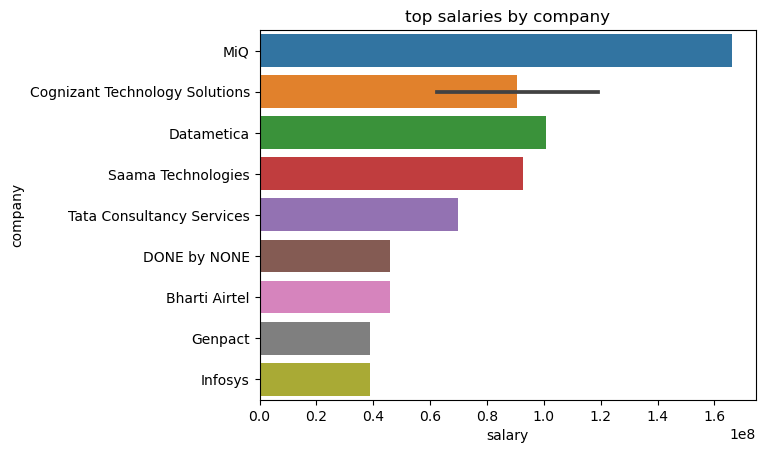

In [28]:
#visualizing the top 10 maximium salary job profiles with company by bar chart
plt.title('top salaries by company')
plt.xlabel('company')
plt.ylabel('salary')
sns.barplot(y="company",x="salary",data=q,)
plt.show()

In [29]:
#checking data analyst job profile
d_a=d[d["job"]=="Data Analyst"]
d_a

,index,company,job,area,salary
1954,1954,Accenture,Data Analyst,Bangalore,608077.0
1955,1955,Tata Consultancy Services,Data Analyst,Bangalore,483697.0
1956,1956,Mu Sigma,Data Analyst,Bangalore,610598.0
1957,1957,Amazon,Data Analyst,Bangalore,670610.0
1958,1958,Myntra,Data Analyst,Bangalore,1004884.0
...,...,...,...,...,...
2937,2938,Edelweiss Tokio Life Insurance,Data Analyst,Mumbai,395292.0
2938,2939,Capital One,Data Analyst,Mumbai,405528.0
2939,2940,Nine A Business Connect,Data Analyst,Mumbai,419172.0
2940,2941,Hans Infotech,Data Analyst,Mumbai,64488.0


In [30]:
max(d_a["salary"])


39009618.6

In [31]:
min(d_a["salary"])


10814.0

In [32]:
#max salary report for data analyst
d_a[d_a["salary"]==39009618.6][["job","company","salary"]]


,job,company,salary
2485,Data Analyst,Genpact,39009618.6


In [33]:
#min slary report 
d_a[d_a["salary"]==10814.0][["job","company","salary"]]


,job,company,salary
2470,Data Analyst,Orbit Technologies,10814.0


In [34]:
#sorting the top 20 data analyst job profile with salary
sort_des=d_a.sort_values(by="salary",ascending=False)
sort_des[0:20]

,index,company,job,area,salary
2485,2486,Genpact,Data Analyst,Hyderabad,39009618.60
2282,2283,EBC,Data Analyst,Pune,6431966.12
2516,2517,Nassau Re,Data Analyst,Hyderabad,3773676.00
2502,2503,Enrich IBS,Data Analyst,Hyderabad,3773676.00
2446,2447,First Student,Data Analyst,Hyderabad,2821536.00
2725,2726,AON,Data Analyst,New Delhi,2385732.00
2329,2330,ASD,Data Analyst,Pune,2363988.00
2437,2438,Virtusa,Data Analyst,Hyderabad,2265324.00
2420,2421,[24]7.ai,Data Analyst,Hyderabad,2243796.00
2453,2454,GigIndia,Data Analyst,Hyderabad,2237700.00


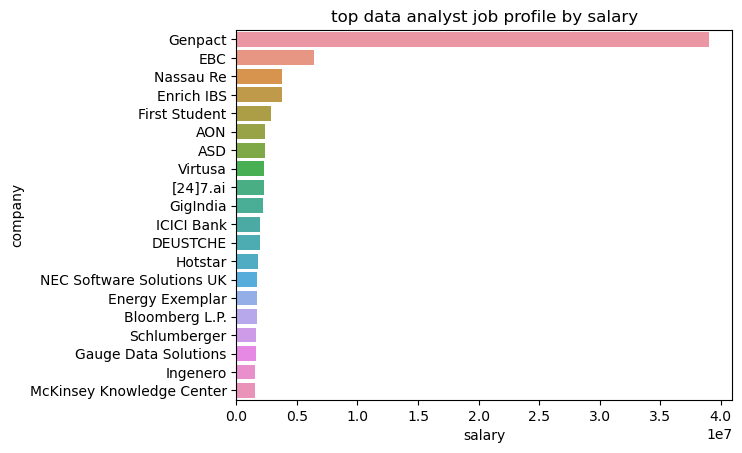

In [35]:
#visualizing top 20 data analyst with job profile salary in a bar graph
plt.title('top data analyst job profile by salary')
plt.xlabel('company')
plt.ylabel('salary')
sns.barplot(y="company",x="salary",data=sort_des[0:20])
plt.show()

In [36]:
#datascientist
d_s=d[d["job"]=="Data Scientist"]
d_s

,index,company,job,area,salary
0,0,Mu Sigma,Data Scientist,Bangalore,648573.0
1,1,IBM,Data Scientist,Bangalore,1191950.0
2,2,Tata Consultancy Services,Data Scientist,Bangalore,836874.0
3,3,Impact Analytics,Data Scientist,Bangalore,669578.0
4,4,Accenture,Data Scientist,Bangalore,944110.0
...,...,...,...,...,...
1950,1950,Rahul Industries,Data Scientist,Mumbai,6044006.0
1951,1951,VINAYA KUMAR,Data Scientist,Mumbai,4029337.0
1952,1952,Visible Alpha,Data Scientist,Mumbai,1581030.0
1953,1953,Netcore Solutions,Data Scientist,Mumbai,509047.0


In [37]:
max(d_s["salary"])


166140358.4

In [38]:
min(d_s["salary"])


48000.0

In [39]:
#max salary for datascientist
d_s[d_s["salary"]==166140358.4][["job","company","salary"]]


,job,company,salary
585,Data Scientist,MiQ,166140358.4


In [40]:
#min salary for data scientist
d_s[d_s["salary"]==48000.0][["job","company","salary"]]


,job,company,salary
581,Data Scientist,Coursera,48000.0
1892,Data Scientist,Unacademy,48000.0


In [41]:
#sorting data scientist job
sort_desc1=d_s.sort_values(by="salary",ascending=False)
sort_desc1[0:20]

,index,company,job,area,salary
585,585,MiQ,Data Scientist,Bangalore,1.661404e+08
1115,1115,Saama Technologies,Data Scientist,Pune,9.273781e+07
1054,1054,Tata Consultancy Services,Data Scientist,Pune,6.977996e+07
1865,1865,DONE by NONE,Data Scientist,Mumbai,4.589844e+07
1869,1869,Bharti Airtel,Data Scientist,Mumbai,4.589821e+07
658,658,Infosys,Data Scientist,Bangalore,3.885189e+07
1070,1070,WNS,Data Scientist,Pune,2.034086e+07
900,900,L Brands,Data Scientist,Bangalore,1.880795e+07
415,415,ICICI Bank,Data Scientist,Bangalore,1.708255e+07
419,419,Hashworks,Data Scientist,Bangalore,1.612206e+07


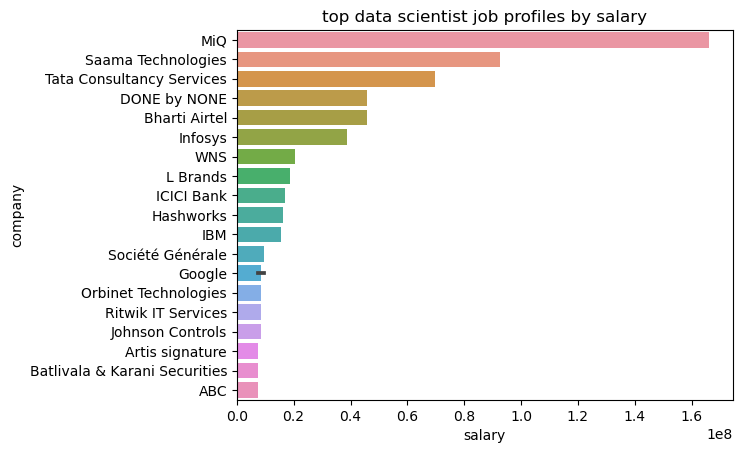

In [42]:
#plotting data scientist job by company name
plt.title('top data scientist job profiles by salary')
plt.xlabel('company')
plt.ylabel('salary')
sns.barplot(y="company",x="salary",data=sort_desc1[0:20])
plt.show()

In [43]:
#top companies having maximum job in data science respectively
d["company"].value_counts()


Tata Consultancy Services     41
Amazon                        31
Accenture                     30
Google                        27
IBM                           26
                              ..
URS Technologies Solutions     1
Aniket Sonawane                1
Brahman bhetun                 1
Airavaat Car Rentals           1
Market Pulse Technologies      1
Name: company, Length: 2528, dtype: int64

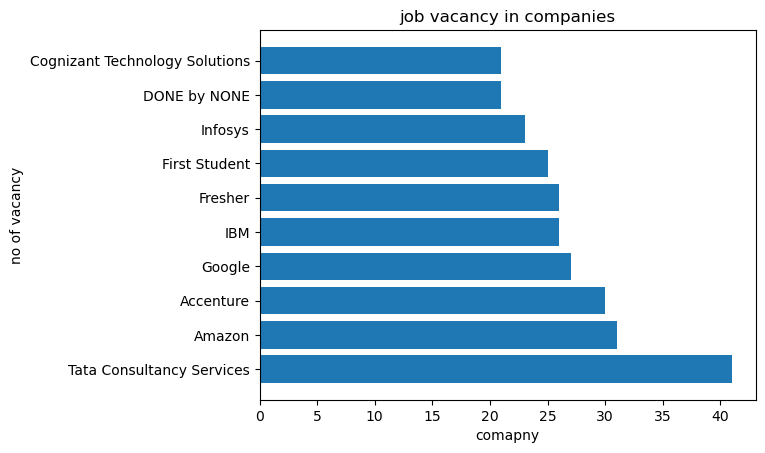

In [44]:
# visualizing the top 10 companies having maximum data science jobs by bar chart
plt.title('job vacancy in companies')
plt.xlabel('comapny')
plt.ylabel('no of vacancy')
plt.barh(list(d["company"].value_counts().keys()[0:10]),list(d["company"].value_counts()[0:10]))
plt.show()

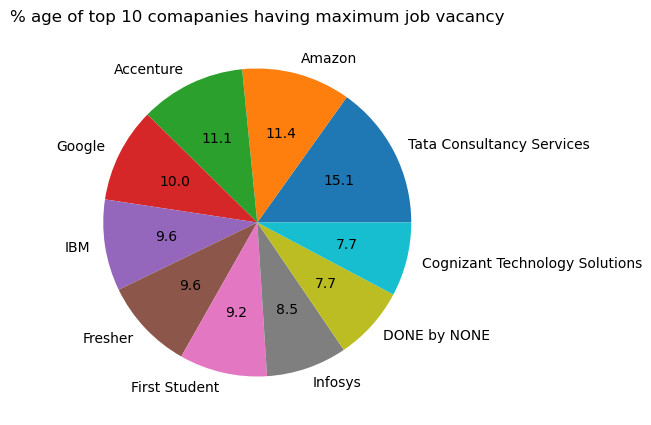

In [45]:
 #pie chart  %age of number of maximum job between top 10 companies
plt.figure(figsize=(10,5))
plt.title('% age of top 10 comapanies having maximum job vacancy')
plt.pie(list(d["company"].value_counts()[0:10]),labels=list(d["company"].value_counts().keys()[0:10]),autopct="%0.1f")
plt.show()

In [46]:
#regions where data science jobs vacancy are maximum respectively
d["area"].value_counts()


Bangalore    1584
Pune          814
Hyderabad     669
New Delhi     655
Mumbai        617
Name: area, dtype: int64

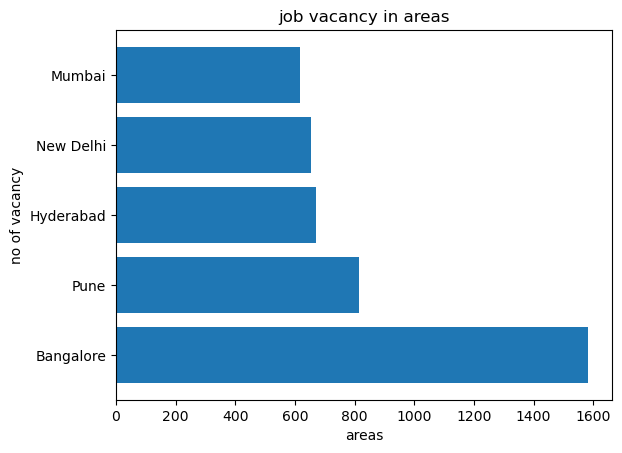

In [47]:
#bar chart visualizing the job vacancy in regions
plt.title('job vacancy in areas')
plt.xlabel('areas')
plt.ylabel('no of vacancy')
plt.barh(list(d["area"].value_counts().keys()),list(d["area"].value_counts()))
plt.show()

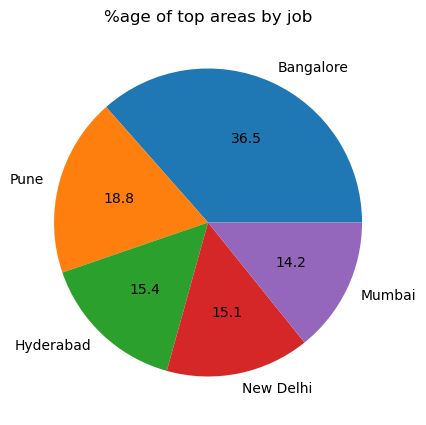

In [48]:
#pie chart showing %age of job between the areas or regions
plt.figure(figsize=(10,5))
plt.title('%age of top areas by job')
plt.pie(list(d["area"].value_counts()),labels=list(d["area"].value_counts().keys()),autopct="%0.1f")
plt.show()

In [49]:
#checking top profiles job
d["job"].value_counts()


Data Scientist                          1844
Data Analyst                             988
Data Engineer                            804
Machine Learning Engineer                568
Data Science                              43
Senior Data Scientist                     39
Junior Data Scientist                     18
Senior Machine Learning Engineer           9
Lead Data Scientist                        6
Machine Learning Scientist                 2
Machine Learning Consultant                2
Software Engineer - Machine Learning       2
Machine Learning Developer                 2
Data Science Associate                     1
Machine Learning Software Engineer         1
Data Science Consultant                    1
Data Science Lead                          1
Machine Learning Data Associate            1
Machine Learning Data Associate I          1
Machine Learning Associate                 1
Machine Learning Data Associate II         1
Associate Machine Learning Engineer        1
Machine Le

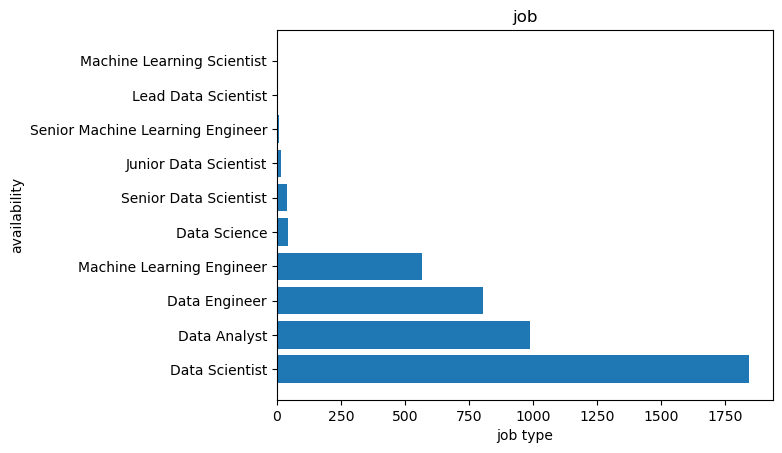

In [50]:
#visualization of top 10 data science job profiles by bar chart
plt.barh(list(d["job"].value_counts().keys()[0:10]),list(d["job"].value_counts()[0:10]))
plt.xlabel("job type")
plt.ylabel("availability")
plt.title("job")
plt.show()

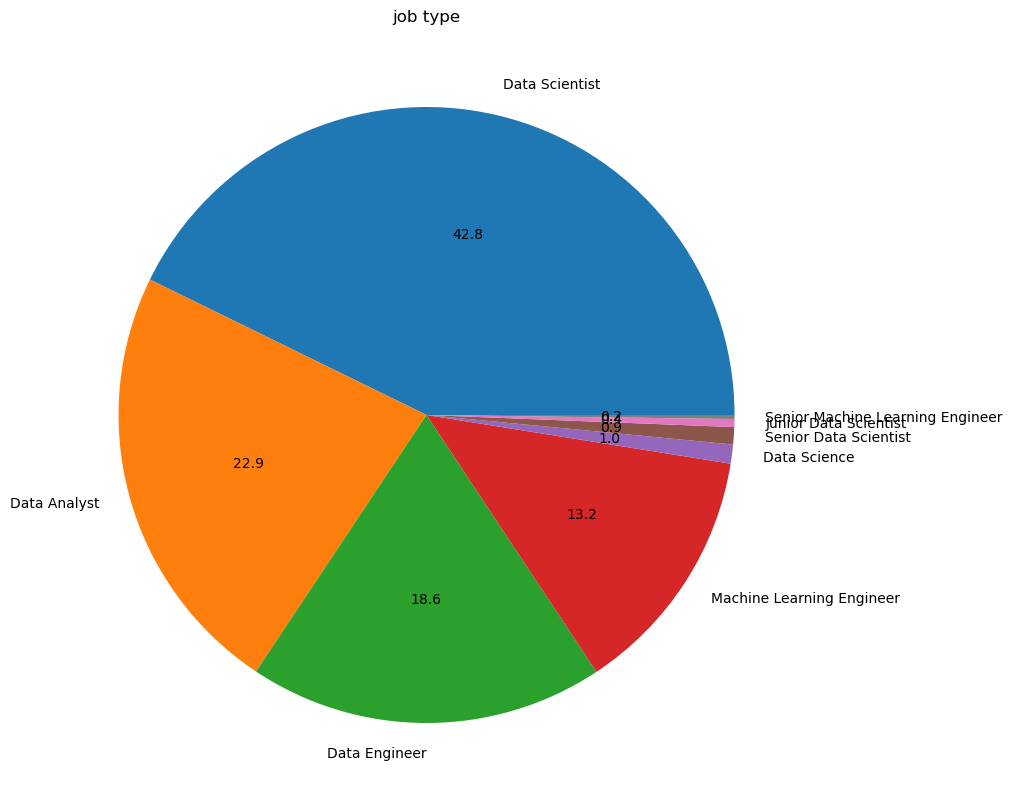

In [51]:
# % of job profile in pie chat
plt.figure(figsize=(15,10))
plt.pie(list(d["job"].value_counts()[0:8]),labels=list(d["job"].value_counts().keys()[0:8]),autopct="%0.1f")
plt.title("job type")
plt.show()

In [52]:
tcs=d[d["company"]=="Tata Consultancy Services"]
tcs

,index,company,job,area,salary
2,2,Tata Consultancy Services,Data Scientist,Bangalore,836874.0
272,272,Tata Consultancy Services,Data Scientist,Bangalore,1427832.0
944,944,Tata Consultancy Services,Data Scientist,Bangalore,374688.0
985,985,Tata Consultancy Services,Data Scientist,Pune,717331.0
1053,1053,Tata Consultancy Services,Data Scientist,Pune,300000.0
1054,1054,Tata Consultancy Services,Data Scientist,Pune,69779958.4
1262,1262,Tata Consultancy Services,Senior Data Scientist,Pune,2092324.0
1278,1278,Tata Consultancy Services,Data Science,Pune,511613.0
1316,1316,Tata Consultancy Services,Senior Data Scientist,Pune,324089.0
1346,1346,Tata Consultancy Services,Junior Data Scientist,Pune,672000.0


In [53]:
#top profile
tcs["job"].value_counts()

Data Scientist               13
Data Analyst                  9
Data Engineer                 9
Machine Learning Engineer     6
Senior Data Scientist         2
Data Science                  1
Junior Data Scientist         1
Name: job, dtype: int64

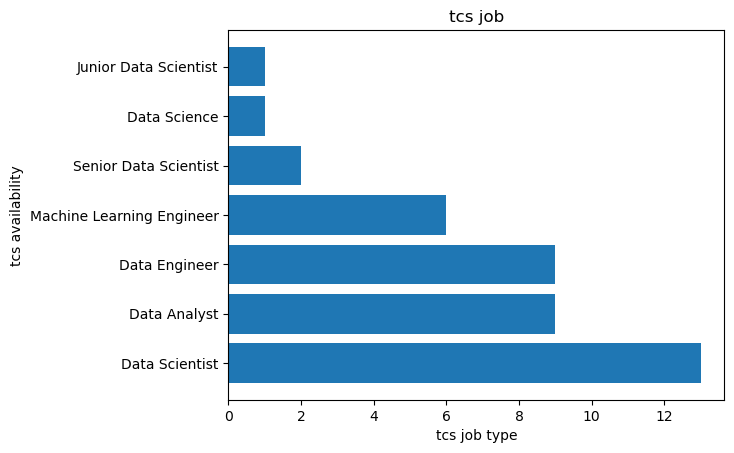

In [54]:
#visualize the top job profile in tcs company
plt.barh(list(tcs["job"].value_counts().keys()),list(tcs["job"].value_counts()))
plt.xlabel("tcs job type")
plt.ylabel("tcs availability")
plt.title("tcs job")
plt.show()

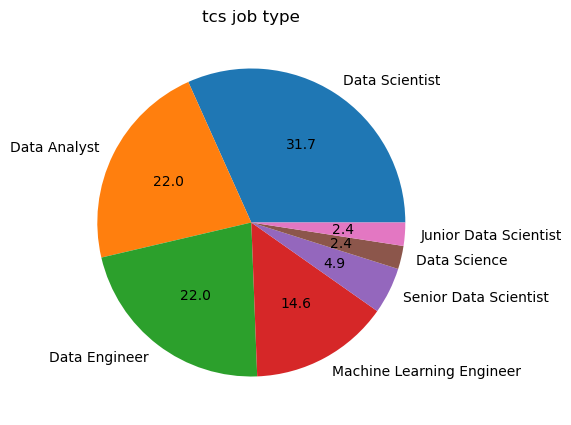

In [55]:
#pie chart representing top profile in %
plt.figure(figsize=(10,5))
plt.pie(list(tcs["job"].value_counts()),labels=list(tcs["job"].value_counts().keys()),autopct="%0.1f")
plt.title("tcs job type")
plt.show()

In [56]:
#max salary to data scientist in a tcs company
tcs_des=tcs.sort_values(by="salary",ascending=False)
tcs_des[0:5]

,index,company,job,area,salary
1054,1054,Tata Consultancy Services,Data Scientist,Pune,69779958.4
1262,1262,Tata Consultancy Services,Senior Data Scientist,Pune,2092324.0
272,272,Tata Consultancy Services,Data Scientist,Bangalore,1427832.0
3116,3117,Tata Consultancy Services,Data Engineer,Bangalore,1210776.0
1520,1520,Tata Consultancy Services,Data Scientist,Hyderabad,1208801.0


In [6]:
data.duplicated().sum()

0